# GSE20680 PCA
_Austin Szatrowski_

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
gse_20680 = pd.read_csv("/Users/austinszatrowski/Documents/UChicago/2024.1 Winter/BIOS 26211 Math Methods for Biological Sciences II/GEOData/GSE20680.csv")
gse_20680.head()

,sample_id,cad_status,g1,g2,g3,g4,g5,g6,g7,g8,...,g45006,g45007,g45008,g45009,g45010,g45011,g45012,g45013,g45014,g45015
0,GSM518638,Control (0),14.411865,4.382594,4.383032,4.383413,4.383747,4.384047,4.384308,4.384539,...,4.375744,4.375470,4.375175,4.374851,4.374460,4.374081,4.373631,4.373159,14.601661,14.611620
1,GSM518639,Control (0),14.716279,4.364848,4.365359,4.365832,4.366276,4.366695,4.367058,4.367406,...,4.369999,4.369760,4.369473,4.369171,4.368822,4.368453,4.368054,4.367606,14.644090,14.645912
2,GSM518640,Control (0),14.774350,4.411638,4.412673,4.413624,4.414528,4.415355,4.416127,4.416819,...,4.414065,4.413724,4.413332,4.412898,4.412431,4.411905,4.490200,4.410683,14.762733,14.760449
3,GSM518641,Control (0),13.386424,4.378086,4.378739,4.379347,4.379895,4.380422,4.380914,4.381344,...,4.381866,4.381684,4.381487,4.381260,4.381008,4.402942,4.380408,4.380068,12.963127,12.872982
4,GSM518642,Control (0),13.486229,4.364260,4.364589,4.364898,4.365172,4.365435,4.365664,4.365880,...,4.359774,4.359587,4.359380,4.359152,4.358910,4.358640,4.358351,4.358035,13.632483,13.543409


In [4]:
gse_20680_pcamatrix = gse_20680.iloc[0:196,2:45017]
gse_20680_pcamatrix.iloc[0:10, 0:10]

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10
0,14.411865,4.382594,4.383032,4.383413,4.383747,4.384047,4.384308,4.384539,4.384732,4.384889
1,14.716279,4.364848,4.365359,4.365832,4.366276,4.366695,4.367058,4.367406,4.367707,4.367985
2,14.774350,4.411638,4.412673,4.413624,4.414528,4.415355,4.416127,4.416819,4.417455,4.418045
3,13.386424,4.378086,4.378739,4.379347,4.379895,4.380422,4.380914,4.381344,4.381747,4.382130
4,13.486229,4.364260,4.364589,4.364898,4.365172,4.365435,4.365664,4.365880,4.366071,4.366241
5,13.593626,4.369297,4.369708,4.370090,4.370448,4.370766,4.371047,4.371302,4.371525,4.371717
6,14.689596,4.393339,4.393933,4.394460,4.394966,4.395464,4.395904,4.396311,4.396713,4.397059
7,14.771351,4.386991,4.387518,4.388000,4.388432,4.388825,4.389163,4.389462,4.389717,4.389940
8,15.440722,4.387858,4.388150,4.388416,4.388647,4.388847,4.389015,4.389154,4.389262,4.389348
9,13.740780,4.565573,4.571993,4.740558,4.499441,4.499631,4.466591,4.397839,4.398353,4.398802


## PCA without Scaling

In [18]:
pca = PCA(n_components=2)
gse_20680_unscaled_pca = pca.fit_transform(gse_20680_pcamatrix)
pca.explained_variance_ratio_

array([0.25427063, 0.09246438])

In [26]:
gse_20680_unscaled_pca = pd.DataFrame(gse_20680_unscaled_pca, columns = ['PC1', 'PC2'])
gse_20680_projected = gse_20680_unscaled_pca.join(gse_20680['cad_status'])
gse_20680_projected

,PC1,PC2,cad_status
0,4.853203,-13.894413,Control (0)
1,-3.885129,36.822243,Control (0)
2,18.431589,-8.625699,Control (0)
3,18.720563,-32.897455,Control (0)
4,-34.119781,-13.574934,Control (0)
...,...,...,...
190,62.986697,-0.434235,Case (2)
191,-1.338604,-9.668971,Case (2)
192,-31.866557,22.116981,Case (2)
193,23.975707,40.250224,Case (2)


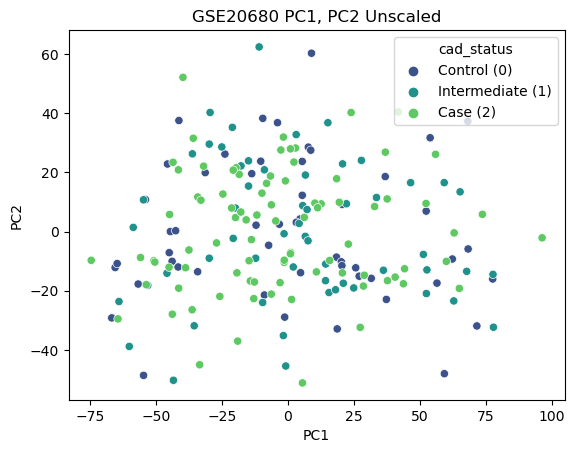

In [25]:
sns.scatterplot(x = gse_20680_projected['PC1'],
                y = gse_20680_projected['PC2'],
                hue=gse_20680_projected['cad_status'],
                palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("GSE20680 PC1, PC2 Unscaled")
plt.show()

## PCA with Scaling

In [9]:
scaler = StandardScaler()
gse_20680_scaled = scaler.fit_transform(gse_20680_pcamatrix)
pca = PCA(n_components=2)
gse_20680_scaled_pca = pca.fit_transform(gse_20680_scaled)
pca.explained_variance_ratio_

array([0.1677696 , 0.09692563])

In [37]:
gse_20680_scaled_pca = pd.DataFrame(gse_20680_scaled_pca, columns = ['PC1', 'PC2'])
gse_20680_scaled_projected = gse_20680_scaled_pca.join(gse_20680['cad_status'])
gse_20680_scaled_projected = gse_20680_scaled_projected.join(gse_20680['sample_id'])
gse_20680_scaled_projected

,PC1,PC2,cad_status,sample_id
0,-40.799001,6.875855,Control (0),GSM518638
1,-70.911270,-14.789994,Control (0),GSM518639
2,98.941431,16.594508,Control (0),GSM518640
3,20.615364,-13.883580,Control (0),GSM518641
4,-100.563897,-8.698972,Control (0),GSM518642
...,...,...,...,...
190,115.456170,-83.349188,Case (2),GSM518828
191,-3.584686,-27.194343,Case (2),GSM518829
192,-48.377151,33.118912,Case (2),GSM518830
193,50.928434,58.060807,Case (2),GSM518831


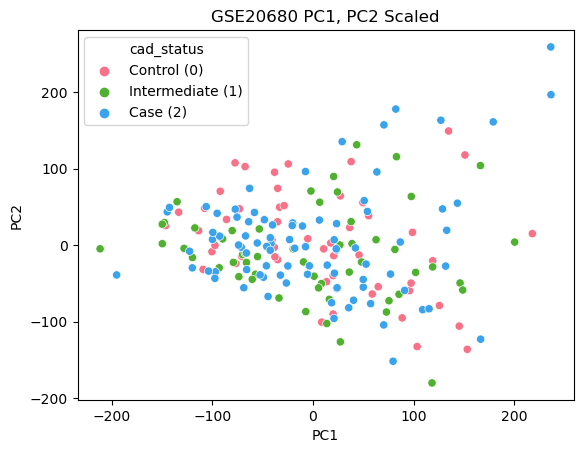

In [38]:
sns.scatterplot(x = gse_20680_scaled_projected['PC1'],
                y = gse_20680_scaled_projected['PC2'],
                hue=gse_20680_scaled_projected['cad_status'],
                palette='husl')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("GSE20680 PC1, PC2 Scaled")
plt.show()

### Export scaled, project data for clustering

In [39]:
gse_20680_scaled_projected.to_csv("GSE20680_scaled_projected.csv",
                                  header = True,
                                  index = False)